In [1]:
import sys
sys.path.insert(0, "/Users/nicoladilillo/Projects_mac/lettuce_spectral_signature")
from cars_model import CARS
import os

In [2]:
# extract the name of the file
col_group = ['Date', 'Class', 'Stress_weight', 'Position']
file_name = '10_SG_MSC/GA-iPLS'
path = os.path.join(os.path.abspath(os.getcwd()), file_name)
c = CARS(path, MAX_COMPONENTS=10, col_group=col_group, calibration=False, cutoff=0.5)

Training samples: 158
	Class Healty: 83 samples
	Class Unhealty: 75 samples
Testing samples: 40
	Class Healty: 21 samples
	Class Unhealty: 19 samples


In [3]:
w = c.compute_survived_wavelengths_best_score_single()
c.plot_survived_df

Best accuracy for run 99 and iteration 13
Best accuracy = 0.825


,Wavelengths,count
0,400.000,1.0
1,401.000,1.0
2,402.000,1.0
3,403.000,1.0
4,404.000,1.0
...,...,...
2096,2496.000,0.0
2097,2497.000,0.0
2098,2498.000,0.0
2099,2499.000,0.0


['1000.000', '1001.000', '1002.000', '1003.000', '1004.000', '1005.000', '1006.000', '1007.000', '1008.000', '1009.000', '1010.000', '1011.000', '1012.000', '1013.000', '1014.000', '1015.000', '1016.000', '1017.000', '1018.000', '1019.000', '1020.000', '1021.000', '1022.000', '1023.000', '1024.000', '1025.000', '1026.000', '1027.000', '1028.000', '1029.000', '1072.000', '1073.000', '1074.000', '1075.000', '1076.000', '1077.000', '1078.000', '1079.000', '1080.000', '1081.000', '1082.000', '1083.000', '1084.000', '1085.000', '1086.000', '1087.000', '1088.000', '1089.000', '1090.000', '1091.000', '1092.000', '1177.000', '1178.000', '1179.000', '1180.000', '1181.000', '1182.000', '1183.000', '1184.000', '1185.000', '1186.000', '1187.000', '1188.000', '1189.000', '1190.000', '1191.000', '1192.000', '1193.000', '1194.000', '1195.000', '1196.000', '1197.000', '1219.000', '1220.000', '1221.000', '1222.000', '1223.000', '1224.000', '1225.000', '1226.000', '1227.000', '1228.000', '1229.000', '12

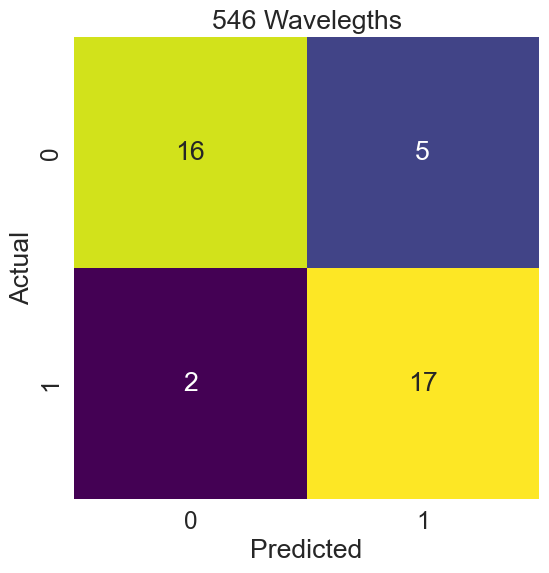

In [4]:
a, l, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=False, model_type='PLS', wavelengths=[w], learning_curve=False, pls_plot=False, peak_detection=False, confusion_matrix_f=True)

import numpy as np
import pandas as pd

# Step 1 & 2: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test_2.flatten())[0]
# print(diff_indices)

# Step 3: Extract corresponding rows from c.df_test_2
diff_rows = c.df_test_2.iloc[diff_indices]

# Step 4: Filter rows where class is 'Uhealty'
stress_rows = diff_rows[diff_rows.index.get_level_values('Class') == 'Unhealty']

# Step : Extract 'Stress_weight' column
stress_weights = diff_rows.index.get_level_values('Stress_weight')

# If you want to print or return the results
print("Mismatched:", diff_rows.index.tolist())
print("Corresponding Stress_weight values:\n", stress_weights)

In [5]:
# for i in l:
#     print(len(i))
#     c.permutation_test(wavelengths=i)